# CS-485: Hands-on on Linear Algebra
**Wednesday 19/02/2025**



# Linear algebra with Numpy

 [Numpy](http://www.numpy.org/) is a high performance library that is used for numerical calculations.

In this section we will see how to:

- Manipulate matrices;
- Solve Matrix equations;
- Calculate Matrix inverse and determinants.

## Manipulating Vectors
$$
V = \begin{pmatrix}
9 & 4 & 0
\end{pmatrix}
\\
$$
$$
V^T = \begin{pmatrix}
9 \\ 4 \\ 0\\
\end{pmatrix}
$$

## Manipulating Matrices

It is straightforward to create a Matrix using Numpy. Let us consider the following as a examples:

$$
A = \begin{bmatrix}
5 & 6 & 2\\
4 & 7 & 19\\
0 & 3 & 12
\end{bmatrix}
$$

$$
B = \begin{bmatrix}
14 & -2 & 12\\
4 & 4 & 5\\
5 & 5 & 1
\end{bmatrix}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

## **NumPy `linalg` Module: Linear Algebra in Python**

The **`numpy.linalg`** module provides powerful tools for **linear algebra operations** such as:
- **Matrix inverses**
- **Determinants**
- **Eigenvalues and eigenvectors**
- **Solving linear systems**
- ...


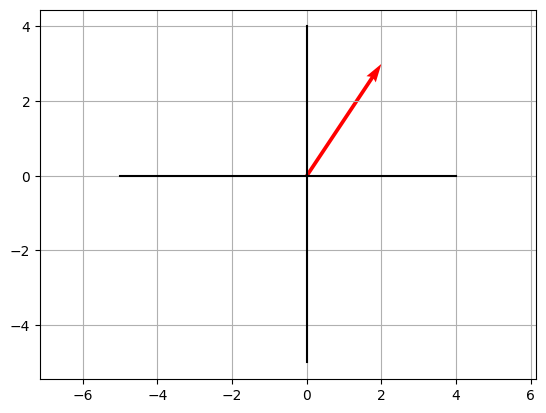

In [2]:
# We'll use a numpy array for our vector
v = np.array([2,3])

# and we'll use a quiver plot to visualize it.
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, *v, scale_units='xy', scale=1, color='r')
plt.plot(list(range(-5,5)), 10*[0], color='black')
plt.plot(10*[0], list(range(-5,5)), color='black')
plt.show()

### Vector Norms

In linear algebra, the norm of a vector $\mathbf{v}$ is often denoted as $\|\mathbf{v}\|$. There are different types of vector norms, including:

1. **Euclidean Norm (L2 Norm):** $\|\mathbf{v}\|_2 = \sqrt{v_1^2 + v_2^2 + \ldots + v_n^2}$

2. **Manhattan Norm (L1 Norm):** $\|\mathbf{v}\|_1 = |v_1| + |v_2| + \ldots + |v_n|$

3. **Infinity Norm (Max Norm):** $\|\mathbf{v}\|_{\infty} = \max(|v_1|, |v_2|, \ldots, |v_n|)$

These norms provide different ways to measure the size or distance of a vector. Choose the norm that best suits your specific application.


In [3]:
vMag = np.linalg.norm(v, ord=1)
print(vMag)

5.0


In [4]:
vMag = np.linalg.norm(v,ord=2)
print(vMag)

3.605551275463989


In [5]:
vMag = np.linalg.norm(v,ord=np.inf)
print(vMag)

3.0


## Manipulating Matrices


We can create an array of zeroes (To store data for example):

In [6]:
zero_array = np.zeros((3, 3))
print(zero_array)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


or an array of ones as:

In [7]:
ones_array = np.ones((4, 4))
print(ones_array)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


Now we can define a custom matrix $A$:

In [8]:
A = np.array([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])

We can also create an array from a range of elements

In [9]:
# Creating an array with a range of elements
range_array = np.arange(10)
print(range_array)

[0 1 2 3 4 5 6 7 8 9]


The identiny matrix:

In [10]:
d = np.eye(10)
print(d)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


or a diagonal matrix:

In [11]:
D = np.diag([1,2,3,4,5,6])
print(D)

[[1 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]


A random matrix of integers in range 1,10 can be created using the command:

In [12]:
A = np.random.randint(1, 10, size=(5, 5))
print(A)

[[3 2 7 3 8]
 [7 5 1 8 2]
 [5 9 5 1 3]
 [3 4 2 1 5]
 [5 4 5 2 7]]


A custom matrix A:

In [13]:
A

array([[3, 2, 7, 3, 8],
       [7, 5, 1, 8, 2],
       [5, 9, 5, 1, 3],
       [3, 4, 2, 1, 5],
       [5, 4, 5, 2, 7]])

In [14]:
B = np.matrix([[14, -2, 12],
               [4, 4, 5],
               [5, 5, 1]])

In [15]:
B

matrix([[14, -2, 12],
        [ 4,  4,  5],
        [ 5,  5,  1]])

We can obtain the following straightforwardly:

- $5A$ (or any other scalar multiple of $A$);
- $A ^ 3$ (or any other exponent of $A$);
- $A + B$;
- $A - B$;
- $AB$

In [16]:
A = np.matrix([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])

In [17]:
5 * A

matrix([[25, 30, 10],
        [20, 35, 95],
        [ 0, 15, 60]])

In [18]:
A ** 3

matrix([[ 557, 1284, 3356],
        [ 760, 2305, 6994],
        [ 288, 1074, 3519]])

In [19]:
A @ A @ A

matrix([[ 557, 1284, 3356],
        [ 760, 2305, 6994],
        [ 288, 1074, 3519]])

In [20]:
A + B

matrix([[19,  4, 14],
        [ 8, 11, 24],
        [ 5,  8, 13]])

In [21]:
A - B

matrix([[ -9,   8, -10],
        [  0,   3,  14],
        [ -5,  -2,  11]])

Note: `*` is the operator for element-wise multiplication

In [22]:
A * B

matrix([[104,  24,  92],
        [179, 115, 102],
        [ 72,  72,  27]])

In [23]:
A@B

matrix([[104,  24,  92],
        [179, 115, 102],
        [ 72,  72,  27]])

We can get the transpose $A^T$ of a matrix:

In [24]:
A.T

matrix([[ 5,  4,  0],
        [ 6,  7,  3],
        [ 2, 19, 12]])

or...

In [25]:
A.transpose()

matrix([[ 5,  4,  0],
        [ 6,  7,  3],
        [ 2, 19, 12]])

# Array indexing

We can access and slice the matrix in the same manner as in lists.

![](http://jalammar.github.io/images/numpy/numpy-array-slice.png)

Same applies for 2 dimensional matrices. If we're indexing or slicing a matrix with dimension greater than 1, we declare each dimension as:

![](http://jalammar.github.io/images/numpy/numpy-matrix-indexing.png)

In [26]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(a)
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[2 3]
 [6 7]]


## **Cosine Similarity**

## **What is Cosine Similarity?**
Cosine similarity measures the **angle between two vectors**, rather than their magnitude. It is defined as:

$$
\cos(\theta) = \frac{A \cdot B}{\|A\| \|B\|}
$$

Where:
- $ A \cdot B $ is the **dot product** of vectors **A** and **B**.
- $ \|A\| $ and $ \|B\| $ are their **magnitudes (norms)**.

### **Interpretation**
- **Cosine similarity = 1** → Vectors are **identical** (angle = 0°).
- **Cosine similarity = 0** → Vectors are **orthogonal** (angle = 90°).
- **Cosine similarity = -1** → Vectors are **opposites** (angle = 180°).

---

## **Application: Word Embeddings**
We can use **word vectors** to compute **semantic similarity** between words.

In [27]:
!pip install spacy
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 29.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [28]:
import spacy

# Load spaCy model with pre-trained word embeddings
nlp = spacy.load("en_core_web_md")  # "md" (medium) includes word vectors

# Define words to compare
word1 = "king"
word2 = "queen"
word3 = "apple"

# Get word vectors
vec1 = nlp(word1).vector
vec2 = nlp(word2).vector
vec3 = nlp(word3).vector

# Function to compute cosine similarity
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Compute similarities
similarity_1_2 = cosine_similarity(vec1, vec2)  # king vs queen
similarity_1_3 = cosine_similarity(vec1, vec3)  # king vs apple

# Print results
print(f"Cosine Similarity between '{word1}' and '{word2}': {similarity_1_2:.4f}")
print(f"Cosine Similarity between '{word1}' and '{word3}': {similarity_1_3:.4f}")

Cosine Similarity between 'king' and 'queen': 0.6109
Cosine Similarity between 'king' and 'apple': 0.1952


In [29]:
# Meause the similarity between king - man + woman and queen
word3 = "man"
word4 = "woman"

# Get word vectors
vec3 = nlp(word3).vector  # man
vec4 = nlp(word4).vector  # woman

# Compute analogy: king - man + woman ≈ queen
vec_analogy = vec1 - vec3 + vec4  # (king - man + woman)

# Compute similarity between computed vector and "queen"
similarity = cosine_similarity(vec_analogy, vec2)

# Print results
print(f"Cosine Similarity between '{word1} - {word3} + {word4}' and '{word2}': {similarity:.4f}")

Cosine Similarity between 'king - man + woman' and 'queen': 0.6178


In [30]:
# Meause the similarity between mathematics + computer science and data science

# Define words
word1 = "mathematics"
word2 = "computer science"
word3 = "data science"
word4 = "machine learning"

# Get word vectors
vec1 = nlp(word1).vector
vec2 = nlp(word2).vector
vec3 = nlp(word3).vector
vec4 = nlp(word4).vector

# Compute analogy: king - man + woman ≈ queen
vec_analogy = vec1 + vec2

# Compute similarity between computed vector and "queen"
similarity1 = cosine_similarity(vec_analogy, vec3)
similarity2 = cosine_similarity(vec_analogy, vec4)

# Print results
print(f"Cosine Similarity between '{word1} + {word2}' and '{word3}': {similarity1:.4f}")
print(f"Cosine Similarity between '{word1} + {word2}' and '{word4}': {similarity2:.4f}")

Cosine Similarity between 'mathematics + computer science' and 'data science': 0.7481
Cosine Similarity between 'mathematics + computer science' and 'machine learning': 0.6696


## Linear transformations
 Linear transformations are operations that transform one vector space into another while preserving the essential properties of the space. In the context of matrices, linear transformations can be represented by multiplication with a transformation matrix. To perform a magnitude transformation, we can scale the magnitude of the vector while keeping its direction constant.

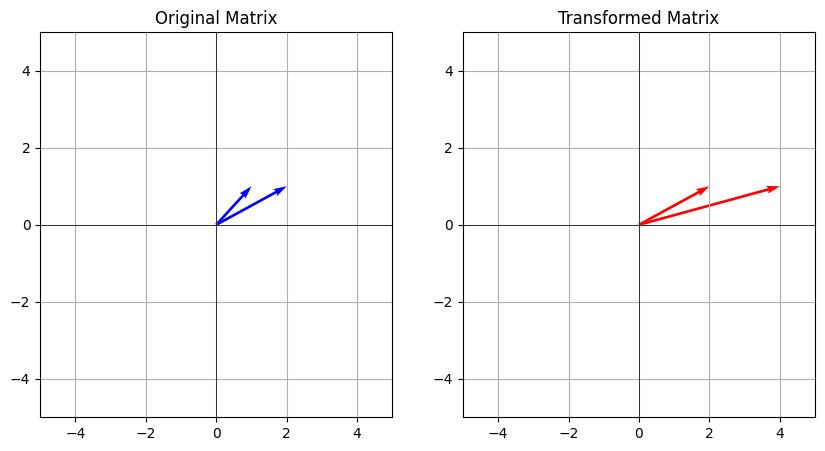

In [31]:
def plot_linear_transformation(matrix, transformation):
    """
    Plots a 2D matrix before and after applying a linear transformation.

    Parameters:
        matrix (numpy.ndarray): A 2xN matrix representing points.
        transformation (numpy.ndarray): A 2x2 transformation matrix.
    """
    # Convert inputs to NumPy arrays
    matrix = np.array(matrix)
    transformation = np.array(transformation)

    # Apply the transformation
    transformed_matrix = transformation @ matrix  # Matrix multiplication

    # Create the subplot
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Function to plot vectors
    def plot_vectors(ax, vectors, color, title):
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)
        ax.grid()
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.set_title(title)

        # Plot each vector
        for i in range(vectors.shape[1]):
            ax.quiver(0, 0, vectors[0, i], vectors[1, i], angles='xy', scale_units='xy', scale=1, color=color)

    # Plot original matrix
    plot_vectors(axes[0], matrix, 'blue', "Original Matrix")

    # Plot transformed matrix
    plot_vectors(axes[1], transformed_matrix, 'red', "Transformed Matrix")

    # Show the plot
    plt.show()

# Example Usage
matrix = np.array([[1, 2], [1, 1]])  # Original points as column vectors
transformation = np.array([[2, 0], [0, 1]])  # Scaling x-coordinates by 2

plot_linear_transformation(matrix, transformation)

Direction Transformation:

For a direction transformation, we can rotate the vector while keeping its magnitude constant. To rotate a matrix counterclockwise through an angle $\theta$ the matrix below is used:
$$
R(\theta) =
\begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{bmatrix}.
$$

This rotates **column vectors** by means of the following **matrix multiplication**,

$$
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}.
$$

Thus, the new coordinates $ (x', y') $ of a point $ (x, y) $ after rotation are

$$
x' = x \cos \theta - y \sin \theta
$$

$$
y' = x \sin \theta + y \cos \theta.
$$

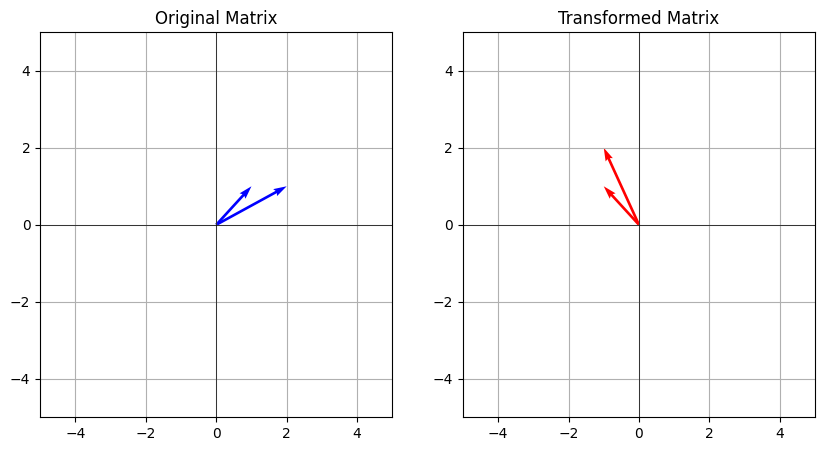

In [32]:
theta = np.pi/2
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
plot_linear_transformation(matrix, rotation_matrix)

### **Affine Transformation:**

1. **Linear Transformation (Magnitude + Direction)**
   - Scaling (resizing objects)
   - Rotation (changing direction)
   - Shearing (distorting shape)
   - Reflection (flipping across an axis)

2. **Translation (Shifting Position)**
   - Moves points in space without altering shape or orientation.

### **Mathematical Representation**

An affine transformation in **2D** can be written as:

$$
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
+
\begin{bmatrix}
t_x \\
t_y
\end{bmatrix}
$$

Where:
- The **2×2 matrix** represents **scaling, rotation, shearing, or reflection** (a linear transformation).
- The **translation vector** $ (t_x, t_y) $ shifts the object.

### **Homogeneous Coordinates**
Affine transformations are often represented using **homogeneous coordinates** to unify linear transformations and translations:

$$
\begin{bmatrix}
x' \\
y' \\
1
\end{bmatrix}
=
\begin{bmatrix}
a & b & t_x \\
c & d & t_y \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
$$

This allows transformations to be performed using **matrix multiplication**.


### **Key Property of Affine Transformations**
Affine transformations **preserve collinearity** and **ratios of distances**, meaning:
- Straight lines remain straight.
- Parallel lines stay parallel.
- Midpoints remain midpoints.

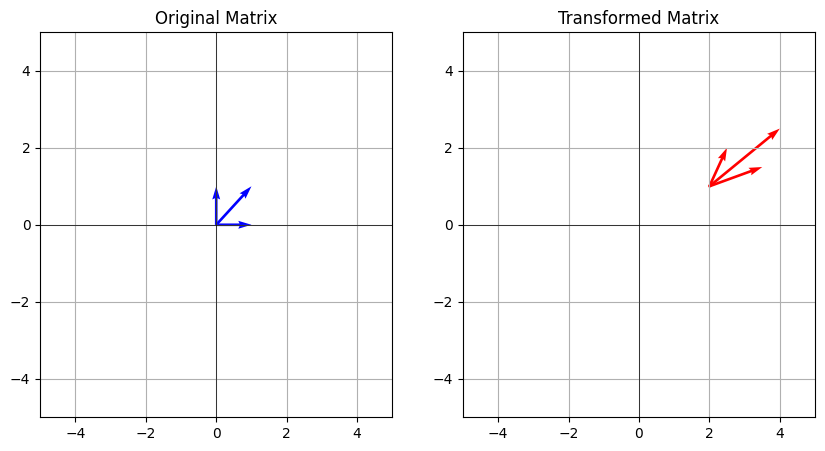

In [33]:
def plot_affine_transformation(matrix, transformation):
    """
    Plots a 2D matrix before and after applying an affine transformation (including translation).

    Parameters:
        matrix (numpy.ndarray): A 2xN matrix representing points.
        transformation (numpy.ndarray): A 3x3 affine transformation matrix.
    """
    # Convert input matrix to homogeneous coordinates (add a row of 1s)
    ones = np.ones((1, matrix.shape[1]))
    homogeneous_matrix = np.vstack([matrix, ones])  # Convert to 3xN matrix

    # Apply the affine transformation
    transformed_matrix = transformation @ homogeneous_matrix  # Matrix multiplication

    # Convert back to 2D (remove homogeneous row)
    transformed_matrix = transformed_matrix[:2, :]

    # Extract the translation vector from the last column of the affine matrix
    translation_vector = transformation[:2, 2]

    # Create the subplot
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    def plot_vectors(ax, vectors, origins, color, title):
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)
        ax.grid()
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.set_title(title)

        # Plot vectors from their actual origins
        ax.quiver(origins[0], origins[1], vectors[0] - origins[0], vectors[1] - origins[1],
                  angles='xy', scale_units='xy', scale=1, color=color)

    # Original vectors should start from (0,0)
    origin_zero = np.zeros_like(matrix)
    plot_vectors(axes[0], matrix, origin_zero, 'blue', "Original Matrix")

    # Transformed vectors should start from their new translated positions
    plot_vectors(axes[1], transformed_matrix, translation_vector.reshape(2, 1) @ np.ones((1, matrix.shape[1])), 'red', "Transformed Matrix")

    # Show the plot
    plt.show()

# Example Usage
matrix = np.array([[0, 1, 1, 0], [0, 0, 1, 1]])  # Square shape

# Affine transformation matrix with translation (shift by (2,1))
affine_transformation = np.array([
    [1.5, 0.5, 2],  # Scaling & shear in x + Translation x=2
    [0.5, 1,  1],   # Shear in y + Translation y=1
    [0,   0,  1]    # Homogeneous row (remains constant)
])

plot_affine_transformation(matrix, affine_transformation)

Let's try with an image

In [34]:
!wget -O logo_uoc.png 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQvCuulAXrKTnqpfV6kPSUljNn-XERHD8em7w&s'

--2025-02-19 10:09:05--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQvCuulAXrKTnqpfV6kPSUljNn-XERHD8em7w&s
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 142.251.8.102, 142.251.8.113, 142.251.8.138, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|142.251.8.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16558 (16K) [image/png]
Saving to: ‘logo_uoc.png’

logo_uoc.png        100%[===================>]  16.17K  --.-KB/s    in 0s      

2025-02-19 10:09:05 (75.9 MB/s) - ‘logo_uoc.png’ saved [16558/16558]



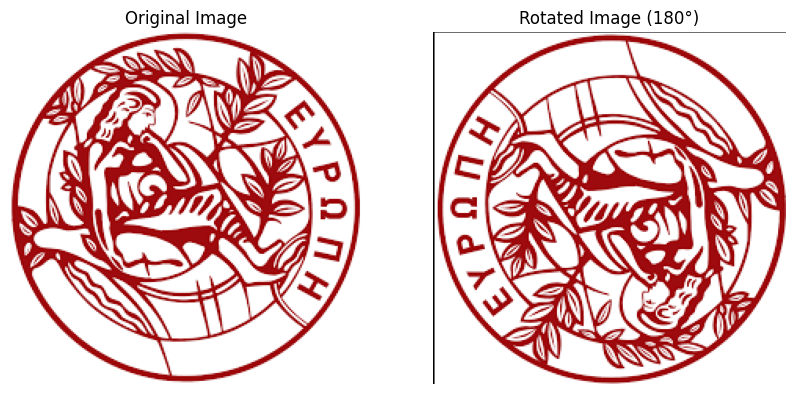

In [35]:
# Load the image
image_path = "./logo_uoc.png"
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # Load image with transparency if available
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display

# Get image dimensions
h, w = image.shape[:2]

# Define rotation angle in degrees
theta = np.radians(180)  # Convert degrees to radians

# Rotation matrix
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Create a grid of (x, y) coordinates
y_indices, x_indices = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')

# Flatten coordinates
coords = np.vstack([x_indices.ravel(), y_indices.ravel()])

# Compute center of the image
center_x, center_y = w / 2, h / 2

# Translate coordinates to center, apply rotation, then translate back
centered_coords = coords - np.array([[center_x], [center_y]])  # Move to center
rotated_coords = R @ centered_coords  # Apply rotation
final_coords = rotated_coords + np.array([[center_x], [center_y]])  # Move back

# Round and clip coordinates to stay within image bounds
x_new = np.clip(np.round(final_coords[0]).astype(int), 0, w - 1)
y_new = np.clip(np.round(final_coords[1]).astype(int), 0, h - 1)

# Create new image with rotated pixels
rotated_image = np.zeros_like(image)
rotated_image[y_new, x_new] = image[y_indices.ravel(), x_indices.ravel()]

# Plot original and rotated images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(rotated_image)
axes[1].set_title("Rotated Image (180°)")
axes[1].axis("off")

plt.show()

## Solving Matrix equations

We can use Numpy to (efficiently) solve large systems of equations of the form:

$$Ax=b$$

Let us illustrate that with:

$$
A = \begin{bmatrix}
5 & 6 & 2\\
4 & 7 & 19\\
0 & 3 & 12
\end{bmatrix}
$$

$$
b = \begin{bmatrix}
-1\\
2\\
1
\end{bmatrix}
$$

We use the `linalg.solve` command:

In [36]:
A = np.matrix([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])
b = np.matrix([[-1], [2], [1]])

In [37]:
x = np.linalg.solve(A, b)
x

matrix([[ 0.45736434],
        [-0.62790698],
        [ 0.24031008]])

---

**EXERCISE** Compute the solutions to the matrix equation $Bx=b$ (using the $B$ defined earlier).

---

In [38]:
np.linalg.solve(B, b)

matrix([[-0.25892857],
        [ 0.40178571],
        [ 0.28571429]])

## Matrix inversion and determinants

Computing the inverse of a matrix is straightforward:

In [39]:
Ainv = np.linalg.inv(A)
Ainv

matrix([[-0.20930233,  0.51162791, -0.7751938 ],
        [ 0.37209302, -0.46511628,  0.6744186 ],
        [-0.09302326,  0.11627907, -0.08527132]])

We can verify that $A^{-1}A=\mathbb{1}$:

In [40]:
A * Ainv

matrix([[ 1.00000000e+00,  4.99600361e-16, -4.71844785e-16],
        [ 1.38777878e-16,  1.00000000e+00, -2.63677968e-16],
        [ 1.11022302e-16,  1.11022302e-16,  1.00000000e+00]])

To calculate the determinant:

In [41]:
np.linalg.det(A)

-129.00000000000009

**Problems with Matrix Inversion**
1. **Computational Cost**: Computing $ A^{-1} $ is **expensive**.
2. **Numerical Instability**: Small errors in $ A $ can lead to large errors in $ A^{-1} $.
---
###  **Problem Statement**
Consider the matrix:

$$
A = c \begin{bmatrix}
    2 & -1 & 0 & 0 \\
    -1 & 2 & -1 & 0 \\
    0 & -1 & 2 & -1 \\
    0 & 0 & -1 & 2
\end{bmatrix}
$$

where $ c = 1, 10^2, 10^5, 10^{10} $. We check whether:

$$
(A^{-1})^{-1} \approx A
$$

and analyze any deviations.

In [42]:
def create_matrix(c):
  A = np.array([
      [2, -1, 0, 0],
      [-1, 2, -1, 0],
      [0, -1, 2, -1],
      [0, 0, -1, 2]
  ])
  return c*A

for c in [1, 10**2, 10**5, 10**(10)]:
    A =create_matrix(c)
    # Compute the inverse of A
    A_inv = np.linalg.inv(A)

    # Compute the inverse of A_inv
    A_inv_inv = np.linalg.inv(A_inv)

    # Check if A_inv_inv is equal to A
    is_equal = np.allclose(A, A_inv_inv)

    print("Original Matrix (A):")
    print(A)
    print("\nInverse of A (A_inv):")
    print(A_inv)
    print("\nInverse of Inverse of A (A_inv_inv):")
    print(A_inv_inv)
    print("\nIs (A_inv_inv) equal to (A)?:", is_equal)
    print(74*"-")

Original Matrix (A):
[[ 2 -1  0  0]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [ 0  0 -1  2]]

Inverse of A (A_inv):
[[0.8 0.6 0.4 0.2]
 [0.6 1.2 0.8 0.4]
 [0.4 0.8 1.2 0.6]
 [0.2 0.4 0.6 0.8]]

Inverse of Inverse of A (A_inv_inv):
[[ 2.00000000e+00 -1.00000000e+00 -1.38777878e-16  0.00000000e+00]
 [-1.00000000e+00  2.00000000e+00 -1.00000000e+00  0.00000000e+00]
 [-1.38777878e-16 -1.00000000e+00  2.00000000e+00 -1.00000000e+00]
 [-5.55111512e-17  0.00000000e+00 -1.00000000e+00  2.00000000e+00]]

Is (A_inv_inv) equal to (A)?: True
--------------------------------------------------------------------------
Original Matrix (A):
[[ 200 -100    0    0]
 [-100  200 -100    0]
 [   0 -100  200 -100]
 [   0    0 -100  200]]

Inverse of A (A_inv):
[[0.008 0.006 0.004 0.002]
 [0.006 0.012 0.008 0.004]
 [0.004 0.008 0.012 0.006]
 [0.002 0.004 0.006 0.008]]

Inverse of Inverse of A (A_inv_inv):
[[ 200. -100.    0.    0.]
 [-100.  200. -100.    0.]
 [   0. -100.  200. -100.]
 [   0.    0. -100.  200.]]

Is (A_

In practise we never invert a matrix to solve a problem. Always use built-in functions to solve linear systems and let the library handle the problem efficiently.

## Regression


### **Background**

Linear regression is one of the simplest and most widely used statistical techniques for modeling relationships between a dependent variable and one independent variable. It assumes a linear relationship of the form:

$$
Y = \beta_0 + \beta_1 X + \epsilon
$$

where:

- **$Y$** is the dependent variable (target variable)
- **$X$** is the independent variable (feature)
- **$\beta_0$** is the intercept
- **$\beta_1$** is the slope (coefficient for $X$)
- **$\epsilon$** is the error term

In this exercise, you will **implement univariate linear regression** from scratch using **NumPy** and apply it to a **synthetic dataset**.

---

#### **1. Generate a Synthetic Dataset**

- Generate a **univariate dataset** where the independent variable **$X$** is randomly sampled from a uniform distribution.
- Define a **true relationship** of the form **$Y = 4 + 3X + \epsilon$**, where $\epsilon$ is random noise from a normal distribution.

In [43]:
# Set random seed for reproducibility
np.random.seed(6090)

# Generate 100 samples of X uniformly between 0 and 2
X = 2 * np.random.rand(100, 1)

# Define the true relationship with noise
true_intercept = 4
true_slope = 3
noise = np.random.randn(100, 1)  # Standard normal noise

y = true_intercept + true_slope * X + noise

#### **2. Implement Linear Regression Using the Normal Equation**

- Compute the optimal weights **$\beta_0$** and **$\beta_1$** by solving:
  $$
  (X^T X) \beta = X^T Y
  $$

In [44]:
def normal_equation(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add intercept term
    A = X_b.T @ X_b
    b = X_b.T @ y
    theta_best = np.linalg.solve(A, b)
    # theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

# Compute coefficients using normal equation
beta = normal_equation(X, y)
print(f"Computed coefficients: Intercept = {beta[0][0]}, Slope = {beta[1][0]}")

Computed coefficients: Intercept = 3.821126923256379, Slope = 3.04799287862525


#### **3. Visualize the Results**

- Plot the **training data points**.
- Overlay the **fitted regression line**.

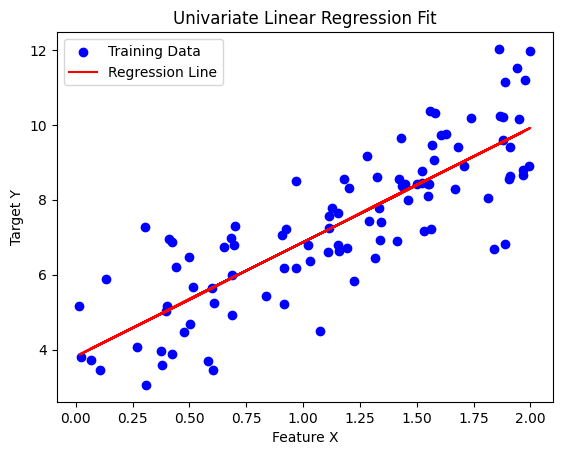

In [45]:
plt.scatter(X, y, color="blue", label="Training Data")
plt.plot(X, np.c_[np.ones((X.shape[0], 1)), X].dot(beta), color="red",
         label="Regression Line")
plt.xlabel("Feature X")
plt.ylabel("Target Y")
plt.legend()
plt.title("Univariate Linear Regression Fit")
plt.show()

## What if:

Systems of linear equations classifies as:
- under-determined if $m < n$ (A wide)
- square if $m = n$ (A square)
- over-determined if $m>n$ (A tall)


Depending on $A$ and $b$, there can be:
- no solution
- one solution
- many solutions

##Least squares problem
This is generally the case when you’re working with real-world data.

- for the most choices of $b$ there is x that satisfies $Ax=b$
- `residual` is $r = Ax - b$
- least square problem: choose $x$ to minimize $||Ax - b||^2$
- $||Ax - b||^2$: is the `objective function`
-$ \hat{x}$ is a solution of least square problem if

$||A \hat{x} - b ||^2 \leq ||Ax - b||^2 $

- $\hat{x} $ called `least squares approximate solution` of $Ax = b$

## **Example: Overdetermined System**


In [46]:
# Overdetermined system: 3 equations, 2 unknowns (m > n)
A = np.array([[1, 1],
              [2, 1],
              [3, 1]])  # 3x2 matrix

b = np.array([2, 2.8, 3.6])  # 3x1 vector

# Solve using least squares
x_ls, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

print("Least Squares Solution:", x_ls)
print("Residuals:", residuals)

Least Squares Solution: [0.8 1.2]
Residuals: [4.93038066e-32]


## **Example: Solving an Underdetermined System in Python**


In [47]:
A = np.array([[1, 1, 1],
              [2, 3, 5]])  # 2x3 matrix

b = np.array([3, 7])  # 2x1 vector

# Solve using least squares (minimum norm solution)
x_ls, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

print("Least Squares Solution:", x_ls)

Least Squares Solution: [ 1.85714286  1.21428571 -0.07142857]
